In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('thesis')
from utils import *

In [2]:
root = "sfhz_1000_20260204_142237"

def load_data(n):
    data = np.load(f"/avatar/vmehta/{root}/{n}_pred_labels.npy")
    return data

sets = [500, 250, 100, 50, 25, 10]

pred_labels_all = []
for n in sets:
    data = load_data(n)
    pred = np.hstack((10**data[:,:10], data[:,10:]))
    pred_labels_all.append(pred)

real = np.load(f"/avatar/vmehta/{root}/true_labels.npy")
real_labels_all = np.hstack((10**real[:,:10], real[:,10:]))

bin_arr = np.r_[np.array([0.1, 20, 50, 100, 200, 500])*1e6, np.logspace(9.5, 10.15, 5)]
binning = np.log10(bin_arr)
bin_widths = np.diff(binning)
bin_centers = binning[:-1] + bin_widths/2

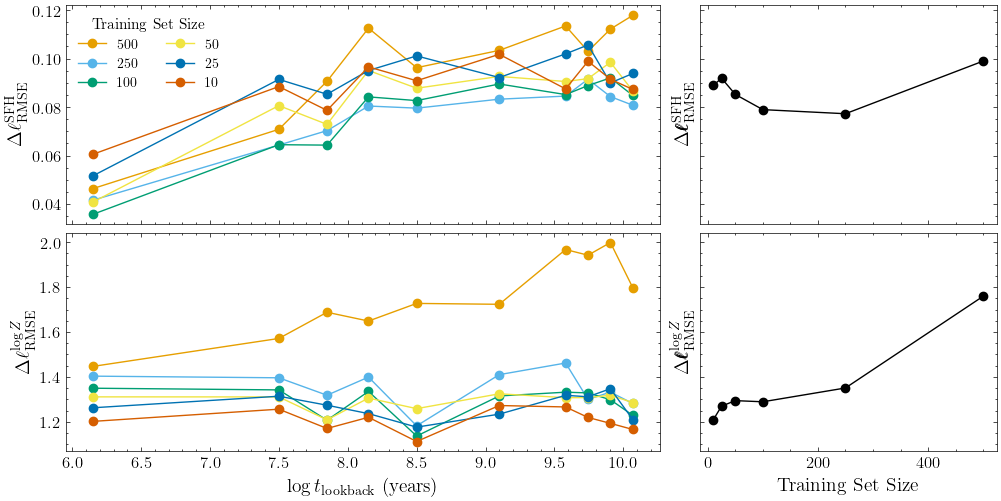

In [3]:
# comparing different size training set

fig, ax = plt.subplots(2, 2, figsize=(10, 5), sharey='row', sharex='col', constrained_layout=True, gridspec_kw={'width_ratios': [2, 1]})

overall = []
for m in range(len(pred_labels_all)):
    rmses, overall_rmses = rmse(real_labels_all, pred_labels_all[m], with_z=True)
    overall.append(overall_rmses)

    ax[0,0].plot(bin_centers, rmses[:10], marker='o')
    ax[1,0].plot(bin_centers, rmses[10:], marker='o')

overall = np.array(overall)
ax[0,1].plot(sets, overall[:,0], 'k', marker='o')
ax[1,1].plot(sets, overall[:,1], 'k', marker='o')

ax[0,0].legend(['500', '250', '100', '50', '25', '10'], title='Training Set Size', loc='upper left', ncol=2, fontsize=10)
ax[0,0].set_ylabel("$\\Delta\\ell^\\mathrm{SFH}_\\mathrm{RMSE}$")
ax[1,0].set_ylabel("$\\Delta\\ell^{\\log Z}_\\mathrm{RMSE}$")
ax[1,0].set_xlabel("$\\log t_\\mathrm{lookback}$ (years)")
ax[0,1].set_ylabel("$\\Delta\\pmb\\ell^\\mathrm{SFH}_\\mathrm{RMSE}$")
ax[1,1].set_ylabel("$\\Delta\\pmb\\ell^{\\log Z}_\\mathrm{RMSE}$")
ax[1,1].set_xlabel("Training Set Size")
#plt.savefig('/home/vmehta/honours-project/thesis/figures/training_set.pdf', format='pdf')
plt.show()